Dataset loaded successfully.
First few rows of the dataset:
  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type 

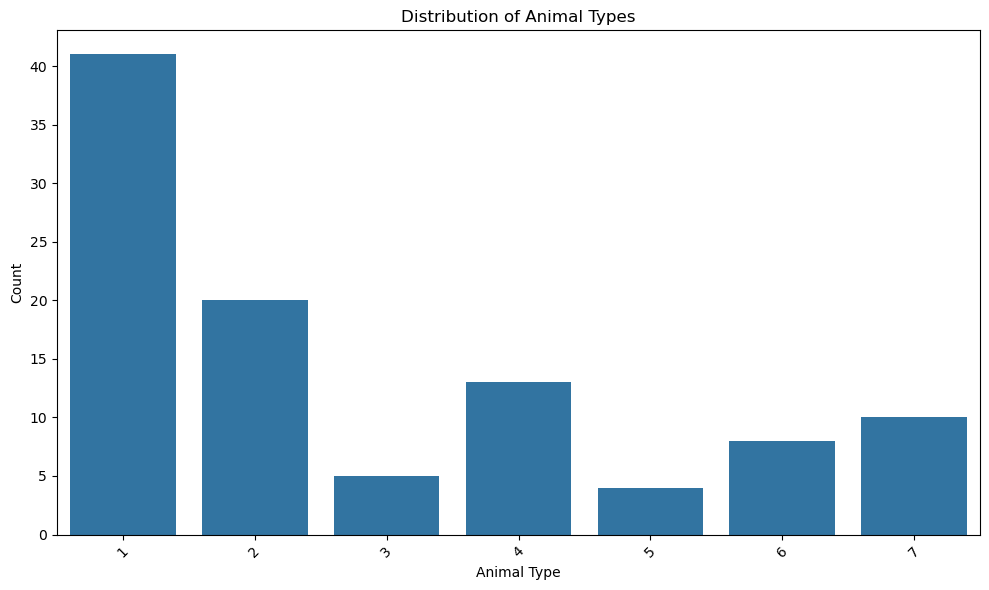

Checking for missing values:
animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64
Accuracy: 0.9523809523809523
Precision: 0.9206349206349207
Recall: 0.9523809523809523
F1-Score: 0.9333333333333333

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92  

C:\Users\Omkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Omkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Omkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Omkar\anaconda3\Lib\site-packag

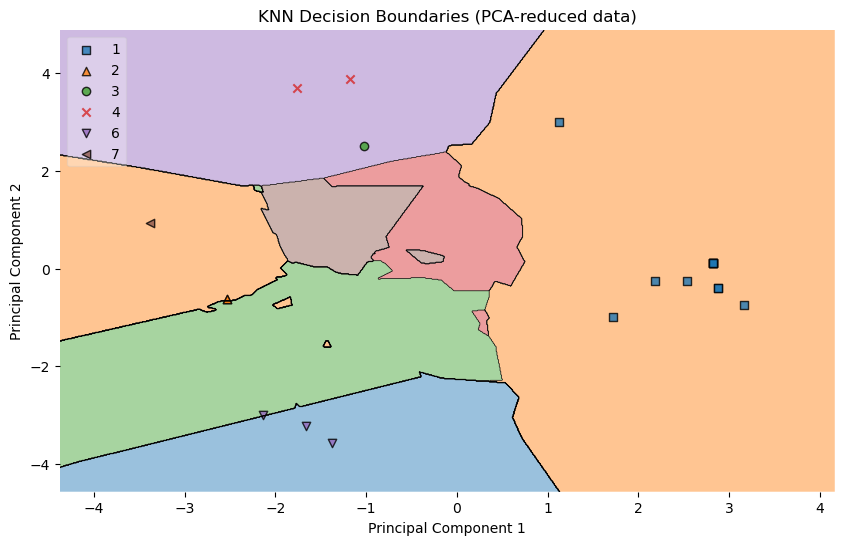

In [1]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

# Disable OpenBLAS threads by setting the environment variables
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

def load_data(file_path):
    "Zoo.csv"
    try:
        df = pd.read_csv(file_path)
        print("Dataset loaded successfully.")
        return df
    except FileNotFoundError:
        print("Error: The file was not found.")
        return None
    except pd.errors.EmptyDataError:
        print("Error: The file is empty.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def visualize_data(df):
    """Visualize the distribution of animal types."""
    plt.figure(figsize=(10, 6))
    sns.countplot(x='type', data=df)
    plt.title('Distribution of Animal Types')
    plt.xlabel('Animal Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def preprocess_data(df):
    """Preprocess the dataset and split it into features and target variable."""
    X = df.drop(columns=['animal name', 'type'])  # Features
    y = df['type']  # Target variable
    return X, y

def train_knn(X_train, y_train, n_neighbors=5):
    """Train the K-Nearest Neighbors model."""
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric='euclidean')
    knn.fit(X_train, y_train)
    return knn

def evaluate_model(model, X_test, y_test):
    """Evaluate the classifier's performance."""
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

def plot_decision_boundaries(X, y, model):
    """Visualize decision boundaries."""
    plt.figure(figsize=(10, 6))
    plot_decision_regions(X, y.values, clf=model, legend=2)
    plt.title('KNN Decision Boundaries (PCA-reduced data)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Load the dataset
file_path = 'Zoo.csv'  # Path to the Zoo.csv file
df = load_data(file_path)

if df is not None:
    # Task 1: Analyze the data using visualizations
    print("First few rows of the dataset:")
    print(df.head())
    visualize_data(df)

    # Task 2: Preprocess the data (Handle missing values and outliers)
    print("Checking for missing values:")
    print(df.isnull().sum())  # Check for missing values

    # Task 3: Split the dataset into training and testing sets (80% training, 20% testing)
    X, y = preprocess_data(df)

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Task 4: Implement the K-Nearest Neighbours algorithm using scikit-learn
    knn = train_knn(X_train, y_train, n_neighbors=5)

    # Task 5: Evaluate the classifier's performance
    evaluate_model(knn, X_test, y_test)

    # Task 6: Visualize decision boundaries
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Split the reduced dataset
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    # Retrain KNN on the reduced dataset
    knn_pca = train_knn(X_train_pca, y_train_pca)

    # Plot decision boundaries
    plot_decision_boundaries(X_test_pca, y_test_pca, knn_pca)


## Interview Questions & Answers
# 1. Key Hyperparameters in KNN
Number of Neighbors (k): This tells the algorithm how many nearby points to consider when making a prediction. If k is too small, the model might be affected by noise (wrong data points). If k is too large, it might miss important patterns.

Distance Metric: This defines how the distance between points is calculated. Common distance metrics include:

Euclidean Distance: The straight-line distance between two points, like measuring with a ruler.
Manhattan Distance: The distance calculated by moving along grid lines (like driving in a city with streets).
Weighting: This determines if all neighbors contribute equally or if closer neighbors have more influence on the prediction.

Uniform Weights: All neighbors count equally.
Distance Weights: Closer neighbors count more.

 Algorithm: Different methods can be used to find neighbors. Options include:

Ball Tree: A method that organizes points in a way that makes it quicker to find neighbors.
KD Tree: A space-partitioning method to organize points in a k-dimensional space.
Brute Force: A straightforward method where all distances are calculated directly.
Leaf Size: This affects the speed and memory used by the algorithm, especially with tree-based methods.

# 2. Distance Metrics in KNN
KNN can use several ways to measure distance between points, depending on the data type. Here are some common ones:

Euclidean Distance: Measures the straight-line distance between two points. Think of it as using a ruler.

Distance
=
∑
(
𝑥
𝑖
−
𝑦
𝑖
)
2
Distance= 
∑(x 
i
​
 −y 
i
​
 ) 
2
 
​
 
Manhattan Distance: Measures the distance by adding up the differences along each dimension, like navigating through city streets.

Distance
=
∑
∣
𝑥
𝑖
−
𝑦
𝑖
∣
Distance=∑∣x 
i
​
 −y 
i
​
 ∣
Minkowski Distance: A general distance formula that can adapt to different situations. You can set it to be Euclidean or Manhattan by choosing the right value for p (1 for Manhattan, 2 for Euclidean).

Distance
=
(
∑
∣
𝑥
𝑖
−
𝑦
𝑖
∣
𝑝
)
1
/
𝑝
Distance=(∑∣x 
i
​
 −y 
i
​
 ∣ 
p
 ) 
1/p
 
Hamming Distance: Used for categorical data, it counts the number of positions where two strings differ (like comparing two binary numbers).

Cosine Similarity: Measures how similar two points are based on the angle between them, often used in text analysis.